In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
data_main = pd.read_csv(r'C:\Users\aje29\OneDrive\Documents\SSN\Project\application_data.csv')

In [3]:
meta_data = pd.read_csv(r'C:\Users\aje29\OneDrive\Documents\SSN\Project\columns_description.csv',encoding='cp1252')

In [4]:
prev_data = pd.read_csv(r'C:\Users\aje29\OneDrive\Documents\SSN\Project\previous_application.csv')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [6]:
df = data_main.copy()
df_md = meta_data.copy()
df_pd = prev_data.copy()

In [7]:
df.shape

(307511, 122)

In [8]:
df_md.Table.unique()

array(['application_data', 'previous_application.csv'], dtype=object)

### Data Cleaning

In [9]:
df.groupby(['NAME_CONTRACT_TYPE'])['SK_ID_CURR'].count()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: SK_ID_CURR, dtype: int64

In [10]:
df.groupby(['CODE_GENDER'])['SK_ID_CURR'].count()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: SK_ID_CURR, dtype: int64

In [11]:
df[df['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044,-10024.0,-3537,13.0,1,1,1,1,1,0,NaN,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,NaN,0.295998,0.461482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,NaN,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,NaN,0.709205,0.310818,0.0165,0.0368,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0233,NaN,0.0115,NaN,0.0000,0.0168,0.0382,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0238,NaN,0.0120,NaN,0.0000,0.0167,0.0368,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0237,NaN,0.0117,NaN,0.000,NaN,block of flats,0.0090,"Stone, brick",No,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,NaN,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.404970,0.659185,0.076984,0.0773,0.1353,0.9921,0.8912,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0630,0.0621,0.0000,NaN,0.0788,0.1404,0.9921,0.8955,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0689,0.0647,0.0000,NaN,0.0781,0.1353,0.9921,0.8927,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0641,0.0632,0.0000,NaN,reg oper spec account,block of flats,0.076

In [12]:
list(df)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [14]:
df.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [15]:
df_md[df_md['Row'] == 'OWN_CAR_AGE']

,Unnamed: 0,Table,Row,Description,Special
21,24,application_data,OWN_CAR_AGE,Age of client's car,NaN


In [16]:
df.groupby(['NAME_CONTRACT_TYPE'])['SK_ID_CURR'].count()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: SK_ID_CURR, dtype: int64

#### Analysing only revolving loans

In [17]:
df.groupby(['NAME_CONTRACT_TYPE','TARGET'])['SK_ID_CURR'].count()

NAME_CONTRACT_TYPE  TARGET
Cash loans          0         255011
                    1          23221
Revolving loans     0          27675
                    1           1604
Name: SK_ID_CURR, dtype: int64

In [18]:
df_rev = df[df['NAME_CONTRACT_TYPE'] == 'Revolving loans']

In [19]:
df_rev.shape

(29279, 122)

#### Taking only columns required for preliminary analysis

In [20]:
df_rev.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,NaN,0.746644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_rev_filtered = df_rev.iloc[:,0:41]

In [22]:
df_rev_filtered.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity


In [23]:
df_md

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [24]:
df_rev_filtered = df_rev_filtered.assign(OBS_30_CNT_SOCIAL_CIRCLE = df_rev['OBS_30_CNT_SOCIAL_CIRCLE'],\
                                        DEF_30_CNT_SOCIAL_CIRCLE = df_rev['DEF_30_CNT_SOCIAL_CIRCLE'],\
                                        OBS_60_CNT_SOCIAL_CIRCLE = df_rev['OBS_60_CNT_SOCIAL_CIRCLE'],\
                                        DEF_60_CNT_SOCIAL_CIRCLE = df_rev['DEF_60_CNT_SOCIAL_CIRCLE'])

In [25]:
df_rev_filtered.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,2.0,0.0,2.0,0.0


In [26]:
df_rev_filtered = pd.concat([df_rev_filtered, df_rev.iloc[:,95:116]], axis = 1 )

In [27]:
df_rev_filtered.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
df_rev_filtered.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29279 entries, 2 to 307496
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   29279 non-null  int64  
 1   TARGET                       29279 non-null  int64  
 2   NAME_CONTRACT_TYPE           29279 non-null  object 
 3   CODE_GENDER                  29279 non-null  object 
 4   FLAG_OWN_CAR                 29279 non-null  object 
 5   FLAG_OWN_REALTY              29279 non-null  object 
 6   CNT_CHILDREN                 29279 non-null  int64  
 7   AMT_INCOME_TOTAL             29279 non-null  float64
 8   AMT_CREDIT                   29279 non-null  float64
 9   AMT_ANNUITY                  29279 non-null  float64
 10  AMT_GOODS_PRICE              29001 non-null  float64
 11  NAME_TYPE_SUITE              28994 non-null  object 
 12  NAME_INCOME_TYPE             29279 non-null  object 
 13  NAME_EDUCATION_

In [29]:
df_rev_filtered.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE'

In [30]:
df_rev_filtered.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis = 1, inplace = True)

In [31]:
df_rev_filtered.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,2.0,0.0,2.0,0.0,-1673.0


In [32]:
df_rev_filtered.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29279 entries, 2 to 307496
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   29279 non-null  int64  
 1   TARGET                       29279 non-null  int64  
 2   NAME_CONTRACT_TYPE           29279 non-null  object 
 3   CODE_GENDER                  29279 non-null  object 
 4   FLAG_OWN_CAR                 29279 non-null  object 
 5   FLAG_OWN_REALTY              29279 non-null  object 
 6   CNT_CHILDREN                 29279 non-null  int64  
 7   AMT_INCOME_TOTAL             29279 non-null  float64
 8   AMT_CREDIT                   29279 non-null  float64
 9   AMT_ANNUITY                  29279 non-null  float64
 10  AMT_GOODS_PRICE              29001 non-null  float64
 11  NAME_TYPE_SUITE              28994 non-null  object 
 12  NAME_INCOME_TYPE             29279 non-null  object 
 13  NAME_EDUCATION_

In [33]:
round((df_rev_filtered.isna().sum()/df_rev_filtered['SK_ID_CURR'].count())*100,1)

SK_ID_CURR                      0.0
TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.9
NAME_TYPE_SUITE                 1.0
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
OWN_CAR_AGE                    65.4
FLAG_MOBIL                      0.0
FLAG_EMP_PHONE                  0.0
FLAG_WORK_PHONE                 0.0
FLAG_CONT_MOBILE                0.0
FLAG_PHONE                      0.0
FLAG_EMAIL                  

In [34]:
# dropping column OWN_CAR_AGE as it has 65% null values

In [35]:
df_rev_filtered.drop(['OWN_CAR_AGE'], axis =1, inplace = True)

In [36]:
round((df_rev_filtered.isna().sum()/df_rev_filtered['SK_ID_CURR'].count())*100,1)

SK_ID_CURR                      0.0
TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.9
NAME_TYPE_SUITE                 1.0
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
FLAG_MOBIL                      0.0
FLAG_EMP_PHONE                  0.0
FLAG_WORK_PHONE                 0.0
FLAG_CONT_MOBILE                0.0
FLAG_PHONE                      0.0
FLAG_EMAIL                      0.0
OCCUPATION_TYPE             

In [37]:
df_md[df_md.Row.isin(df_rev_filtered.columns)]

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [38]:
df_rev_filtered.groupby(['CODE_GENDER']).count()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
CODE_GENDER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,19648,19648,19648,19648,19648,19648,19648,19648,19648,19459,19453,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,13943,19647,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,18994,18994,18994,18994,19648
M,9627,9627,9627,9627,9627,9627,9627,9627,9627,9538,9537,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,7743,9626,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9261,9261,9261,9261,9627
XNA,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [39]:
df_rev_filtered = df_rev_filtered[df_rev_filtered['CODE_GENDER'] != 'XNA']

In [40]:
df_rev_filtered.groupby(['CODE_GENDER']).count()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
CODE_GENDER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,19648,19648,19648,19648,19648,19648,19648,19648,19648,19459,19453,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,13943,19647,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,19648,18994,18994,18994,18994,19648
M,9627,9627,9627,9627,9627,9627,9627,9627,9627,9538,9537,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,7743,9626,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9627,9261,9261,9261,9261,9627


In [41]:
df_rev_filtered.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,2.0,0.0,2.0,0.0,-1673.0


In [42]:
# 0 - not defaulter
# 1 - defaulter

In [43]:
df_rev_filtered['TARGET'] = df_rev_filtered['TARGET'].apply(lambda x: 'Defaulter' if x == 1 else 'Not Defaulter')

In [44]:
df_rev_filtered.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
2,100004,Not Defaulter,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0
9,100012,Not Defaulter,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,2.0,0.0,2.0,0.0,-1673.0


In [45]:
df_rev_filtered.groupby(['TARGET'])['SK_ID_CURR'].count()

TARGET
Defaulter         1604
Not Defaulter    27671
Name: SK_ID_CURR, dtype: int64

In [46]:
df_rev_filtered.groupby(['FLAG_OWN_REALTY'])['SK_ID_CURR'].count()

FLAG_OWN_REALTY
N     6174
Y    23101
Name: SK_ID_CURR, dtype: int64

In [47]:
df_rev_filtered.groupby(['FLAG_OWN_CAR'])['SK_ID_CURR'].count()

FLAG_OWN_CAR
N    19147
Y    10128
Name: SK_ID_CURR, dtype: int64

In [48]:
df_rev_filtered.groupby(['CNT_CHILDREN'])['SK_ID_CURR'].count()

CNT_CHILDREN
0     18916
1      7064
2      2855
3       386
4        47
5         5
6         1
12        1
Name: SK_ID_CURR, dtype: int64

In [49]:
df_rev_filtered.groupby(['NAME_TYPE_SUITE'])['SK_ID_CURR'].count()

NAME_TYPE_SUITE
Children             302
Family              3461
Group of people       28
Other_A              100
Other_B              178
Spouse, partner      939
Unaccompanied      23982
Name: SK_ID_CURR, dtype: int64

In [50]:
df_rev_filtered.groupby(['NAME_INCOME_TYPE'])['SK_ID_CURR'].count()

NAME_INCOME_TYPE
Businessman                10
Commercial associate     7964
Maternity leave             3
Pensioner                3369
State servant            1867
Student                     3
Unemployed                  7
Working                 16052
Name: SK_ID_CURR, dtype: int64

In [51]:
df_rev_filtered.groupby(['NAME_FAMILY_STATUS'])['SK_ID_CURR'].count()

NAME_FAMILY_STATUS
Civil marriage           2793
Married                 17718
Separated                1924
Single / not married     5735
Unknown                     2
Widow                    1103
Name: SK_ID_CURR, dtype: int64

In [52]:
df_rev_filtered.groupby(['NAME_HOUSING_TYPE'])['SK_ID_CURR'].count()

NAME_HOUSING_TYPE
Co-op apartment          128
House / apartment      25476
Municipal apartment      945
Office apartment         276
Rented apartment         591
With parents            1859
Name: SK_ID_CURR, dtype: int64

In [53]:
df_rev_filtered.groupby(['OCCUPATION_TYPE'])['SK_ID_CURR'].count()

OCCUPATION_TYPE
Accountants              1206
Cleaning staff            418
Cooking staff             509
Core staff               3195
Drivers                  1355
HR staff                   85
High skill tech staff    1372
IT staff                  106
Laborers                 5055
Low-skill Laborers        162
Managers                 2632
Medicine staff            797
Private service staff     293
Realty agents              76
Sales staff              3568
Secretaries               136
Security staff            543
Waiters/barmen staff      178
Name: SK_ID_CURR, dtype: int64

In [54]:
df_rev_filtered.groupby(['CNT_FAM_MEMBERS'])['SK_ID_CURR'].count()

CNT_FAM_MEMBERS
1.0      7015
2.0     13337
3.0      5901
4.0      2610
5.0       360
6.0        43
7.0         5
8.0         1
14.0        1
Name: SK_ID_CURR, dtype: int64

In [55]:
df_rev_filtered.groupby(['REGION_RATING_CLIENT'])['SK_ID_CURR'].count()

REGION_RATING_CLIENT
1     3789
2    21154
3     4332
Name: SK_ID_CURR, dtype: int64

In [56]:
df_rev_filtered.groupby(['REGION_RATING_CLIENT_W_CITY'])['SK_ID_CURR'].count()

REGION_RATING_CLIENT_W_CITY
1     3977
2    21448
3     3850
Name: SK_ID_CURR, dtype: int64

In [57]:
df_rev_filtered.groupby(['WEEKDAY_APPR_PROCESS_START'])['SK_ID_CURR'].count()

WEEKDAY_APPR_PROCESS_START
FRIDAY       4953
MONDAY       4760
SATURDAY     3357
SUNDAY       1741
THURSDAY     4775
TUESDAY      4790
WEDNESDAY    4899
Name: SK_ID_CURR, dtype: int64

In [58]:
df_rev_filtered.groupby(['HOUR_APPR_PROCESS_START'])['SK_ID_CURR'].count()

HOUR_APPR_PROCESS_START
0        1
1        1
2       28
3       86
4      154
5      292
6      462
7      753
8     1209
9     2171
10    3195
11    3388
12    3461
13    3094
14    2784
15    2636
16    2233
17    1712
18    1046
19     453
20     106
21      10
Name: SK_ID_CURR, dtype: int64

In [59]:
df_rev_filtered.groupby(['ORGANIZATION_TYPE'])['SK_ID_CURR'].count()

ORGANIZATION_TYPE
Advertising                 61
Agriculture                161
Bank                       396
Business Entity Type 1     738
Business Entity Type 2    1190
Business Entity Type 3    7237
Cleaning                    24
Construction               637
Culture                     49
Electricity                107
Emergency                   55
Government                 935
Hotel                       87
Housing                    243
Industry: type 1            89
Industry: type 10           15
Industry: type 11          271
Industry: type 12           46
Industry: type 13            8
Industry: type 2            49
Industry: type 3           291
Industry: type 4           110
Industry: type 5            61
Industry: type 6            15
Industry: type 7           143
Industry: type 8             2
Industry: type 9           346
Insurance                   84
Kindergarten               606
Legal Services              46
Medicine                  1074
Military             

In [60]:
df_rev_filtered.shape

(29275, 45)

In [61]:
df_rev_filtered.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_S

In [62]:
df_rev_filtered.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
2,100004,Not Defaulter,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0
9,100012,Not Defaulter,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,2.0,0.0,2.0,0.0,-1673.0


In [63]:
import seaborn as sb

<AxesSubplot:>

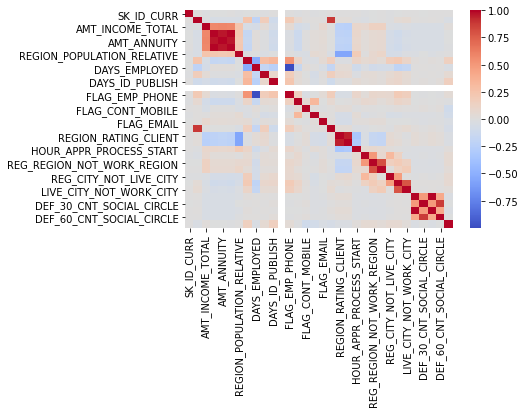

In [64]:
sb.heatmap(df_rev_filtered.corr(), cmap = 'coolwarm')

In [65]:
# sb.swarmplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_INCOME_TOTAL', data = df_rev_filtered,  hue='TARGET')
#sB.swarmplot(x='class',y='age',data=titanic, hue='TARGET')

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT'>

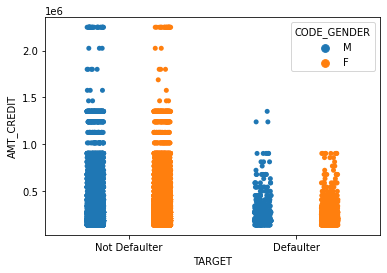

In [66]:
sb.stripplot(x="TARGET", y="AMT_CREDIT", hue="CODE_GENDER", data=df_rev_filtered, dodge=True)

In [67]:
df_rev_filtered['AMT_CREDIT']

2          135000.0
9          405000.0
17         270000.0
18         157500.0
20         427500.0
29         180000.0
39         540000.0
45         180000.0
50         135000.0
57         247500.0
67         270000.0
68         450000.0
76         135000.0
80         135000.0
83         270000.0
100        180000.0
107        180000.0
109        135000.0
114        180000.0
120        675000.0
122        270000.0
132        180000.0
147        225000.0
155        135000.0
165        315000.0
180        540000.0
194        270000.0
198        405000.0
201        180000.0
233        337500.0
234        180000.0
242        135000.0
245        180000.0
259        540000.0
264        675000.0
294        495000.0
308        135000.0
311        180000.0
313        202500.0
319       1350000.0
340        180000.0
379        405000.0
391       1350000.0
394        270000.0
396        225000.0
397        540000.0
405       1350000.0
410        900000.0
411        495000.0
415        180000.0


In [68]:
df_rev_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29275 entries, 2 to 307496
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   29275 non-null  int64  
 1   TARGET                       29275 non-null  object 
 2   NAME_CONTRACT_TYPE           29275 non-null  object 
 3   CODE_GENDER                  29275 non-null  object 
 4   FLAG_OWN_CAR                 29275 non-null  object 
 5   FLAG_OWN_REALTY              29275 non-null  object 
 6   CNT_CHILDREN                 29275 non-null  int64  
 7   AMT_INCOME_TOTAL             29275 non-null  float64
 8   AMT_CREDIT                   29275 non-null  float64
 9   AMT_ANNUITY                  29275 non-null  float64
 10  AMT_GOODS_PRICE              28997 non-null  float64
 11  NAME_TYPE_SUITE              28990 non-null  object 
 12  NAME_INCOME_TYPE             29275 non-null  object 
 13  NAME_EDUCATION_

In [69]:
df_rev_filtered.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
2,100004,Not Defaulter,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0
9,100012,Not Defaulter,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,2.0,0.0,2.0,0.0,-1673.0


In [70]:
df_rev_filtered.reset_index(drop=True, inplace = True)

In [71]:
df_rev_filtered.tail(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
29273,456229,Not Defaulter,Revolving loans,F,N,Y,1,270000.0,180000.0,9000.0,180000.0,Family,Working,Secondary / secondary special,Separated,With parents,0.003813,-11973,-670,-1926.0,-626,1,1,1,1,0,0,Sales staff,2.0,2,2,SATURDAY,18,1,1,0,1,1,0,Business Entity Type 3,0.0,0.0,0.0,0.0,-336.0
29274,456240,Not Defaulter,Revolving loans,F,N,N,0,360000.0,337500.0,16875.0,337500.0,Family,Working,Higher education,Married,House / apartment,0.004960,-17345,-2178,-4262.0,-876,1,1,0,1,0,0,Cooking staff,2.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,0.0,0.0,0.0,0.0,-826.0


<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='AMT_CREDIT'>

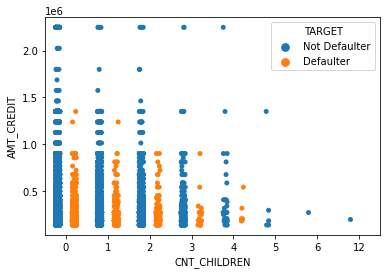

In [72]:
sb.stripplot(x="CNT_CHILDREN", y="AMT_CREDIT", hue="TARGET", data=df_rev_filtered, dodge=True)

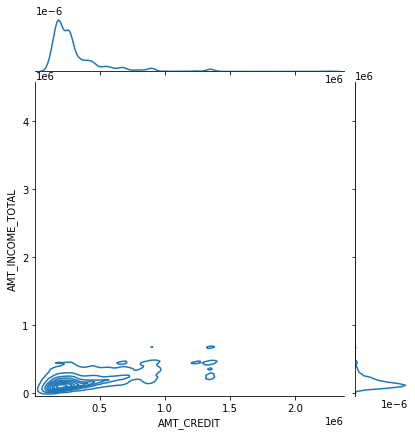

In [73]:
sb.jointplot(x = "AMT_CREDIT", y = "AMT_INCOME_TOTAL",kind = "kde", data = df_rev_filtered)

In [74]:
df_rev_filtered.corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,1.000000,0.010709,-0.013766,-0.000772,-0.003061,0.000457,-0.010278,-0.002366,-0.003167,-0.014599,0.000729,NaN,0.002887,-0.014158,0.003297,-0.010435,-0.003909,0.009614,0.005968,0.007871,0.003109,-0.009973,-0.001458,0.003778,-0.008812,-0.002886,0.003183,0.006511,-0.000110,0.006633,0.000270,0.005135
CNT_CHILDREN,0.010709,1.000000,-0.015079,-0.047296,-0.041131,-0.046161,-0.042909,0.243101,-0.204623,0.177104,-0.100652,NaN,0.205368,0.064548,0.011989,0.011579,0.015066,0.883085,0.027363,0.026357,-0.014117,-0.025778,-0.006382,0.006527,-0.008146,0.040487,0.056115,0.015012,0.001102,0.015118,0.000464,-0.037986
AMT_INCOME_TOTAL,-0.013766,-0.015079,1.000000,0.581407,0.586743,0.579961,0.243687,-0.048604,-0.060998,0.047047,-0.062871,NaN,0.059021,-0.074147,-0.054248,0.001177,0.070877,0.004449,-0.230160,-0.242311,0.087987,0.070972,0.147789,0.141769,-0.028533,-0.046552,-0.027276,-0.043780,-0.042843,-0.043915,-0.043466,0.023597
AMT_CREDIT,-0.000772,-0.047296,0.581407,1.000000,0.968128,0.994950,0.227143,-0.168159,0.022087,-0.010454,-0.096027,NaN,-0.024938,-0.120279,0.007084,0.024472,0.037936,-0.006222,-0.210949,-0.222535,0.087951,0.025592,0.058649,0.069082,-0.069502,-0.096624,-0.056497,-0.046348,-0.042862,-0.046269,-0.042350,-0.007247
AMT_ANNUITY,-0.003061,-0.041131,0.586743,0.968128,1.000000,0.963125,0.214884,-0.155205,0.019355,-0.008625,-0.090217,NaN,-0.022025,-0.110786,0.005073,0.025613,0.040243,-0.003463,-0.198158,-0.209761,0.083421,0.025876,0.056237,0.064017,-0.064784,-0.090907,-0.054222,-0.044168,-0.040517,-0.044175,-0.039587,-0.001752
AMT_GOODS_PRICE,0.000457,-0.046161,0.579961,0.994950,0.963125,1.000000,0.227172,-0.168226,0.021710,-0.011156,-0.097206,NaN,-0.024594,-0.114158,0.007964,0.030217,0.039174,-0.005576,-0.210968,-0.222346,0.088380,0.024916,0.058585,0.069437,-0.070184,-0.096530,-0.055832,-0.045668,-0.041003,-0.045586,-0.040293,-0.008966
REGION_POPULATION_RELATIVE,-0.010278,-0.042909,0.243687,0.227143,0.214884,0.227172,1.000000,-0.012315,-0.004037,-0.023787,-0.003109,NaN,0.003902,-0.028869,-0.034115,0.061683,0.046868,-0.035521,-0.561890,-0.560725,0.191828,0.001130,0.073197,0.107240,-0.066859,-0.061109,-0.021324,-0.024499,-0.006514,-0.024199,-0.009439,0.004867
DAYS_BIRTH,-0.002366,0.243101,-0.048604,-0.168159,-0.155205,-0.168226,-0.012315,1.000000,-0.523010,0.292727,0.343760,NaN,0.528984,0.113691,-0.018383,-0.025601,0.054044,0.160257,-0.020536,-0.018838,0.114147,0.061848,0.078116,0.044832,0.178684,0.208361,0.112620,0.023478,0.006358,0.022849,0.010609,0.153676
DAYS_EMPLOYED,-0.003167,-0.204623,-0.060998,0.022087,0.019355,0.021710,-0.004037,-0.523010,1.000000,-0.176351,-0.234117,NaN,-0.999500,-0.155450,0.025502,0.005548,-0.040408,-0.177705,0.041208,0.041589,-0.097213,-0.029081,-0.090908,-0.077847,-0.074142,-0.198247,-0.164035,0.001235,0.013251,0.001330,0.014180,-0.037402
DAYS_REGISTRATION,-0.014599,0.177104,0.047047,-0.010454,-0.008625,-0.011156,-0.023787,0.292727,-0.176351,1.000000,0.087700,NaN,0.178669,0.052659,-0.006183,-0.059540,0.020527,0.168565,0.073424,0.067532,-0.018757,0.035312,0.039730,0.023086,0.055137,0.086306,0.059235,0.012537,0.007805,0.012885,0.006887,0.058115


In [75]:
df_rev_filtered.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                 285
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

In [76]:
df_rev_filtered.groupby(['OCCUPATION_TYPE'])['SK_ID_CURR'].count()

OCCUPATION_TYPE
Accountants              1206
Cleaning staff            418
Cooking staff             509
Core staff               3195
Drivers                  1355
HR staff                   85
High skill tech staff    1372
IT staff                  106
Laborers                 5055
Low-skill Laborers        162
Managers                 2632
Medicine staff            797
Private service staff     293
Realty agents              76
Sales staff              3568
Secretaries               136
Security staff            543
Waiters/barmen staff      178
Name: SK_ID_CURR, dtype: int64

In [77]:
df_rev_filtered['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Managers', 'Sales staff', 'Core staff',
       'Security staff', nan, 'Drivers', 'Medicine staff', 'Secretaries',
       'High skill tech staff', 'Cooking staff', 'Accountants',
       'Low-skill Laborers', 'HR staff', 'IT staff', 'Realty agents',
       'Waiters/barmen staff', 'Cleaning staff', 'Private service staff'],
      dtype=object)

In [78]:
df_md.head(25)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [79]:
df_rev_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   29275 non-null  int64  
 1   TARGET                       29275 non-null  object 
 2   NAME_CONTRACT_TYPE           29275 non-null  object 
 3   CODE_GENDER                  29275 non-null  object 
 4   FLAG_OWN_CAR                 29275 non-null  object 
 5   FLAG_OWN_REALTY              29275 non-null  object 
 6   CNT_CHILDREN                 29275 non-null  int64  
 7   AMT_INCOME_TOTAL             29275 non-null  float64
 8   AMT_CREDIT                   29275 non-null  float64
 9   AMT_ANNUITY                  29275 non-null  float64
 10  AMT_GOODS_PRICE              28997 non-null  float64
 11  NAME_TYPE_SUITE              28990 non-null  object 
 12  NAME_INCOME_TYPE             29275 non-null  object 
 13  NAME_EDUCATION_T

In [80]:
df_rev_filtered.dropna(inplace = True)

In [81]:
df_rev_filtered.reset_index(drop=True, inplace = True)

In [82]:
df_rev_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20764 entries, 0 to 20763
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   20764 non-null  int64  
 1   TARGET                       20764 non-null  object 
 2   NAME_CONTRACT_TYPE           20764 non-null  object 
 3   CODE_GENDER                  20764 non-null  object 
 4   FLAG_OWN_CAR                 20764 non-null  object 
 5   FLAG_OWN_REALTY              20764 non-null  object 
 6   CNT_CHILDREN                 20764 non-null  int64  
 7   AMT_INCOME_TOTAL             20764 non-null  float64
 8   AMT_CREDIT                   20764 non-null  float64
 9   AMT_ANNUITY                  20764 non-null  float64
 10  AMT_GOODS_PRICE              20764 non-null  float64
 11  NAME_TYPE_SUITE              20764 non-null  object 
 12  NAME_INCOME_TYPE             20764 non-null  object 
 13  NAME_EDUCATION_T

In [83]:
df_rev_filtered.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [84]:
df_rev_filtered.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_S

In [85]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [86]:
import pandas_profiling as pp

In [87]:
profile = pp.ProfileReport(df_rev_filtered)
profile.to_file("output.html")

In [88]:
df_rev_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20764 entries, 0 to 20763
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   20764 non-null  int64  
 1   TARGET                       20764 non-null  object 
 2   NAME_CONTRACT_TYPE           20764 non-null  object 
 3   CODE_GENDER                  20764 non-null  object 
 4   FLAG_OWN_CAR                 20764 non-null  object 
 5   FLAG_OWN_REALTY              20764 non-null  object 
 6   CNT_CHILDREN                 20764 non-null  int64  
 7   AMT_INCOME_TOTAL             20764 non-null  float64
 8   AMT_CREDIT                   20764 non-null  float64
 9   AMT_ANNUITY                  20764 non-null  float64
 10  AMT_GOODS_PRICE              20764 non-null  float64
 11  NAME_TYPE_SUITE              20764 non-null  object 
 12  NAME_INCOME_TYPE             20764 non-null  object 
 13  NAME_EDUCATION_T

In [89]:
df_md

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [90]:
df_rev_filtered['AGE'] = round(abs(df_rev_filtered['DAYS_BIRTH']/365),1)

In [91]:
df_rev_filtered['WORK_EXPERIENCE'] = round(abs(df_rev_filtered['DAYS_EMPLOYED']/365),1)

In [92]:
df_rev_filtered.drop(['DAYS_REGISTRATION'], axis = 1, inplace = True)

In [93]:
df_rev_filtered['YEARS_SINCE_ID_CHANGE'] = round(abs(df_rev_filtered['DAYS_ID_PUBLISH']/365),1)

In [94]:
df_rev_filtered['YEARS_SINCE_PHONE_CHANGE'] = round(abs(df_rev_filtered['DAYS_LAST_PHONE_CHANGE']/365),1)

In [95]:
df_rev_filtered.drop(['DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_BIRTH'], axis = 1, inplace = True)

In [96]:
df_rev_filtered.drop(['DAYS_LAST_PHONE_CHANGE'], axis = 1, inplace = True)

In [97]:
df_rev_filtered['FLAG_EMAIL'] = df_rev_filtered['FLAG_EMAIL'].apply(lambda x: 'Provided Email ID' if x == 1 else 'Not Provided Email ID')
df_rev_filtered['FLAG_PHONE'] = df_rev_filtered['FLAG_PHONE'].apply(lambda x: 'Provided home phone' if x == 1 else 'Not Provided home phone')
df_rev_filtered['FLAG_CONT_MOBILE'] = df_rev_filtered['FLAG_CONT_MOBILE'].apply(lambda x: 'Mobile reachable' if x == 1 else 'Mobile not reachable')
df_rev_filtered['FLAG_MOBIL'] = df_rev_filtered['FLAG_MOBIL'].apply(lambda x: 'Provided mobile number' if x == 1 else 'Not provided mobile num')
df_rev_filtered.drop(['FLAG_EMP_PHONE','FLAG_WORK_PHONE'], axis = 1, inplace = True)

In [98]:
df_rev_filtered.drop(['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',\
                      'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'], axis = 1, inplace = True)

In [99]:
df_rev_filtered.shape

(20764, 36)

In [100]:
df_rev_filtered.drop(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',\
                      'DEF_60_CNT_SOCIAL_CIRCLE'], axis = 1, inplace = True)

In [101]:
df_rev_filtered['CODE_GENDER'] = df_rev_filtered['CODE_GENDER'].apply(lambda x: 'MALE' if x == 'M' else 'FEMALE')

In [106]:
df_rev_filtered['FLAG_OWN_CAR'] = df_rev_filtered['FLAG_OWN_CAR'].apply(lambda x: 'OWN CAR' if x == 'Y' else 'NO CAR')
df_rev_filtered['FLAG_OWN_REALTY'] = df_rev_filtered['FLAG_OWN_REALTY'].apply(lambda x: 'OWNS HOUSE/FLAT' if x == 'Y' else 'NO HOUSE/FLAT')

In [109]:
df_rev_filtered['CODE_GENDER'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [108]:
df_rev_filtered['FLAG_OWN_CAR'].unique()

array(['OWN CAR', 'NO CAR'], dtype=object)

In [110]:
df_rev_filtered.head(25)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AGE,WORK_EXPERIENCE,YEARS_SINCE_ID_CHANGE,YEARS_SINCE_PHONE_CHANGE
0,100004,Not Defaulter,Revolving loans,MALE,OWN CAR,OWNS HOUSE/FLAT,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,Provided mobile number,Mobile reachable,Provided home phone,Not Provided Email ID,Laborers,1.0,2,2,MONDAY,9,Government,52.2,0.6,6.9,2.2
1,100012,Not Defaulter,Revolving loans,MALE,NO CAR,OWNS HOUSE/FLAT,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,Provided mobile number,Mobile reachable,Not Provided home phone,Not Provided Email ID,Laborers,1.0,2,2,THURSDAY,8,Electricity,39.6,5.5,10.9,4.6
2,100021,Not Defaulter,Revolving loans,FEMALE,NO CAR,OWNS HOUSE/FLAT,1,81000.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010966,Provided mobile number,Mobile reachable,Not Provided home phone,Not Provided Email ID,Laborers,3.0,2,2,MONDAY,10,Construction,26.8,0.5,6.6,7.7
3,100022,Not Defaulter,Revolving loans,FEMALE,NO CAR,OWNS HOUSE/FLAT,0,112500.0,157500.0,7875.0,157500.0,Other_A,Working,Secondary / secondary special,Widow,House / apartment,0.046220,Provided mobile number,Mobile reachable,Provided home phone,Not Provided Email ID,Laborers,1.0,1,1,FRIDAY,13,Housing,48.5,21.4,3.4,0.7
4,100024,Not Defaulter,Revolving loans,MALE,OWN CAR,OWNS HOUSE/FLAT,0,135000.0,427500.0,21375.0,427500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.015221,Provided mobile number,Mobile reachable,Not Provided home phone,Not Provided Email ID,Laborers,2.0,2,2,FRIDAY,13,Self-employed,50.0,11.7,4.9,0.8
5,100034,Not Defaulter,Revolving loans,MALE,NO CAR,OWNS HOUSE/FLAT,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,Provided mobile number,Mobile reachable,Not Provided home phone,Not Provided Email ID,Laborers,1.0,2,2,TUESDAY,16,Business Entity Type 3,28.3,2.8,8.3,1.6
6,100046,Not Defaulter,Revolving loans,MALE,OWN CAR,OWNS HOUSE/FLAT,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,Provided mobile number,Mobile reachable,Not Provided home phone,Not Provided Email ID,Managers,2.0,2,2,TUESDAY,8,Business Entity Type 3,44.2,4.8,11.8,1.5
7,100052,Not Defaulter,Revolving loans,FEMALE,NO CAR,OWNS HOUSE/FLAT,1,90000.0,180000.0,9000.0,180000.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,0.009334,Provided mobile number,Mobile reachable,Not Provided home phone,Not Provided Email ID,Sales staff,3.0,2,2,MONDAY,10,Self-employed,21.8,2.5,1.8,1.3
8,100058,Not Defaulter,Revolving loans,FEMALE,NO CAR,OWNS HOUSE/FLAT,0,54000.0,135000.0,6750.0,135000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.014520,Provided mobile number,Mobile not reachable,Not Provided home phone,Not Provided Email ID,Core staff,2.0,2,2,THURSDAY,9,School,34.0,3.2,7.1,0.0
9,100068,Not Defaulter,Revolving loans,MALE,NO CAR,OWNS HOUSE/FLAT,0,81000.0,247500.0,12375.0,247500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,Provided mobile number,Mobile reachable,Provided home phone,Not Provided Email ID,Security staff,2.0,2,2,WEDNESDAY,14,Security,50.0,6.4,4.7,0.5


In [111]:
df_rev_filtered['AMT_GOODS_PRICE'].describe()

count    2.076400e+04
mean     3.181999e+05
std      2.282300e+05
min      4.500000e+04
25%      1.800000e+05
50%      2.700000e+05
75%      3.375000e+05
max      2.250000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [112]:
df_rev_filtered['AMT_CREDIT'].describe()

count    2.076400e+04
mean     3.168790e+05
std      2.272831e+05
min      1.350000e+05
25%      1.800000e+05
50%      2.700000e+05
75%      3.375000e+05
max      2.250000e+06
Name: AMT_CREDIT, dtype: float64

In [118]:
df_rev_filtered.drop(['REGION_RATING_CLIENT_W_CITY'], axis = 1, inplace = True)

In [119]:
df_rev_filtered.to_excel(r'C:\Users\aje29\Documents\Jupyter notebooks\SSN\Project\Cleaned app data.xlsx', index = False)

In [114]:
from sqlalchemy import create_engine

In [115]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Ajith@2907"
)

mycursor = mydb.cursor()

mycursor.execute("CREATE DATABASE Credit_Card_Fraud")


In [120]:
hostname="localhost"
dbname="Credit_Card_Fraud"
uname="root"
pwd="Ajith@2907"
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))
df_rev_filtered.to_sql('app_data', engine, if_exists = 'replace', index=False)

In [117]:
engine.execute('ALTER TABLE app_data ADD PRIMARY KEY (`SK_ID_CURR`);')

In [121]:
mydb.close()

In [122]:
engine.close()

AttributeError: 'Engine' object has no attribute 'close'

In [123]:
engine.dispose()